In [1]:
from google.colab import drive 

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Londaon Housing Data/5. London Housing Data.csv')

In [5]:
data

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN
...,...,...,...,...,...,...
13544,9/1/2019,england,249942,E92000001,64605.0,NaN
13545,10/1/2019,england,249376,E92000001,68677.0,NaN
13546,11/1/2019,england,248515,E92000001,67814.0,NaN
13547,12/1/2019,england,250410,E92000001,NaN,NaN


# 1. Explore Data Analysis

BY count() & isnull function

In [6]:
data.count()

date             13549
area             13549
average_price    13549
code             13549
houses_sold      13455
no_of_crimes      7439
dtype: int64

In [7]:
data.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

**For Visulization of data, we use seaborn and matplotlib**

In [8]:
import seaborn as sns

In [9]:
import matplotlib.pyplot as plt


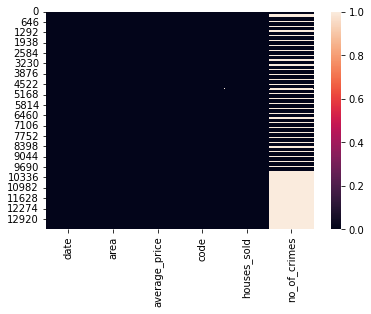

In [10]:
sns.heatmap(data.isnull())

# **Data Cleaning Process**

**1. Convert the datatype of 'Date' Column to a date-time format**

In [11]:
data.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN


In [12]:
data.dtypes

date              object
area              object
average_price      int64
code              object
houses_sold      float64
no_of_crimes     float64
dtype: object

In [15]:
## change format of 'date' to 'datetime'

data['date'] = pd.to_datetime(data.date)

In [17]:
data.dtypes

date             datetime64[ns]
area                     object
average_price             int64
code                     object
houses_sold             float64
no_of_crimes            float64
dtype: object

**2. Add new Column 'Year' in dataframe**

In [16]:
data.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN


In [24]:
## Syntex to add new column in dataframe

data['Year'] = data.date.dt.year
## data['Month'] = data.date.dt.month

In [25]:
data.head()

,date,area,average_price,code,houses_sold,no_of_crimes,Year,Month
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995,2
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1995,3
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1995,4
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1995,5


**3. Add new Column 'Month' as 2nd column in dataframe which has only 'month'**

In [26]:
## use insert command

data.insert(1,'month',data.date.dt.month)

In [37]:
data.head(3)

,date,area,average_price,code,houses_sold,no_of_crimes,Month
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,2
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,3


**4. Remove the column 'year' and ' month' from dataset**

To drop the column

data.drop( ['month','Year'], axis=1).head()

In [40]:
data.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes,Month
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,2


**5. Show all the records where 'No. of Crimes' is 0. How many no. are there?**

In [45]:
data[data['no_of_crimes'] ==0]  

,date,area,average_price,code,houses_sold,no_of_crimes,Month
72,2001-01-01,city of london,284262,E09000001,24.0,0.0,1
73,2001-02-01,city of london,198137,E09000001,37.0,0.0,2
74,2001-03-01,city of london,189033,E09000001,44.0,0.0,3
75,2001-04-01,city of london,205494,E09000001,38.0,0.0,4
76,2001-05-01,city of london,223459,E09000001,30.0,0.0,5
...,...,...,...,...,...,...,...
178,2009-11-01,city of london,397909,E09000001,11.0,0.0,11
179,2009-12-01,city of london,411955,E09000001,16.0,0.0,12
180,2010-01-01,city of london,464436,E09000001,20.0,0.0,1
181,2010-02-01,city of london,490525,E09000001,9.0,0.0,2


In [47]:
## For no. of crimes
len(data[data['no_of_crimes'] ==0])


104

**6. What is Maximum and Mininum 'avarage_price per year in england**

In [50]:
data.insert(7,'Year',data.date.dt.year)

In [51]:
data.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes,Month,Year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,2,1995


In [54]:
df1= data[data.area == 'england']

In [56]:
df1.head()

,date,area,average_price,code,houses_sold,no_of_crimes,Month,Year
13248,1995-01-01,england,53203,E92000001,47639.0,NaN,1,1995
13249,1995-02-01,england,53096,E92000001,47880.0,NaN,2,1995
13250,1995-03-01,england,53201,E92000001,67025.0,NaN,3,1995
13251,1995-04-01,england,53591,E92000001,56925.0,NaN,4,1995
13252,1995-05-01,england,53678,E92000001,64192.0,NaN,5,1995


In [67]:
## Maximum/Mininum/mean 'avarage_price per year in england
#df1.groupby('Year').average_price.min()
#df1.groupby('Year').average_price.mean()
df1.groupby('Year').average_price.max()

Year
1995     53901
1996     55755
1997     61564
1998     65743
1999     75071
2000     84191
2001     95992
2002    119982
2003    138985
2004    160330
2005    167244
2006    182031
2007    194764
2008    191750
2009    174136
2010    180807
2011    177335
2012    180129
2013    188544
2014    203639
2015    219582
2016    231922
2017    242628
2018    248620
2019    250410
2020    247355
Name: average_price, dtype: int64

**7. What is Maximum and Minimum No. of crimes recorted per 'area'**

data.groupby('area').no_of_crimes.min()

data.groupby('area').no_of_crimes.max().sort_values(ascending =True)

In [69]:
 data.groupby('area').no_of_crimes.min()
# data.groupby('area').no_of_crimes.mean()
# data.groupby('area').no_of_crimes.max()

area
barking and dagenham      1217.0
barnet                    1703.0
bexley                     860.0
brent                     1850.0
bromley                   1441.0
camden                    2079.0
city of london               0.0
croydon                   2031.0
ealing                    1871.0
east midlands                NaN
east of england              NaN
enfield                   1635.0
england                      NaN
greenwich                 1513.0
hackney                   1870.0
hammersmith and fulham    1323.0
haringey                  1536.0
harrow                     937.0
havering                  1130.0
hillingdon                1445.0
hounslow                  1529.0
inner london                 NaN
islington                 1871.0
kensington and chelsea    1347.0
kingston upon thames       692.0
lambeth                   2381.0
lewisham                  1675.0
london                       NaN
merton                     819.0
newham                    2130.0
north

In [77]:
data.groupby('area').no_of_crimes.max().sort_values(ascending =True)

area
city of london              10.0
kingston upon thames      1379.0
sutton                    1425.0
richmond upon thames      1551.0
merton                    1623.0
harrow                    1763.0
bexley                    1914.0
havering                  1956.0
barking and dagenham      2049.0
redbridge                 2560.0
bromley                   2637.0
hammersmith and fulham    2645.0
kensington and chelsea    2778.0
enfield                   2798.0
lewisham                  2813.0
hounslow                  2817.0
hillingdon                2819.0
greenwich                 2853.0
barnet                    2893.0
brent                     2937.0
waltham forest            2941.0
wandsworth                3051.0
haringey                  3199.0
croydon                   3263.0
tower hamlets             3316.0
islington                 3384.0
ealing                    3401.0
hackney                   3466.0
newham                    3668.0
southwark                 3821.0
camde

**8. Show the total count of record of each area, where avarage price is less than 100000**

In [83]:
data[data.average_price < 100000].area.value_counts().sort_values(ascending =True)

city of london           11
islington                19
barnet                   25
wandsworth               26
harrow                   30
kingston upon thames     30
ealing                   31
inner london             31
bromley                  33
haringey                 33
merton                   35
london                   39
brent                    40
hounslow                 41
lambeth                  41
hillingdon               44
outer london             46
tower hamlets            47
southwark                48
redbridge                52
hackney                  53
enfield                  54
sutton                   54
croydon                  57
greenwich                59
south east               59
havering                 60
lewisham                 62
waltham forest           64
bexley                   64
newham                   72
east of england          76
south west               78
barking and dagenham     85
england                  87
west midlands       